In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 514 entries, Province/State to 6/14/21
dtypes: float64(2), int64(510), object(2)
memory usage: 1.1+ MB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 514 entries, Province/State to 6/14/21
dtypes: float64(2), int64(510), object(2)
memory usage: 1.1+ MB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


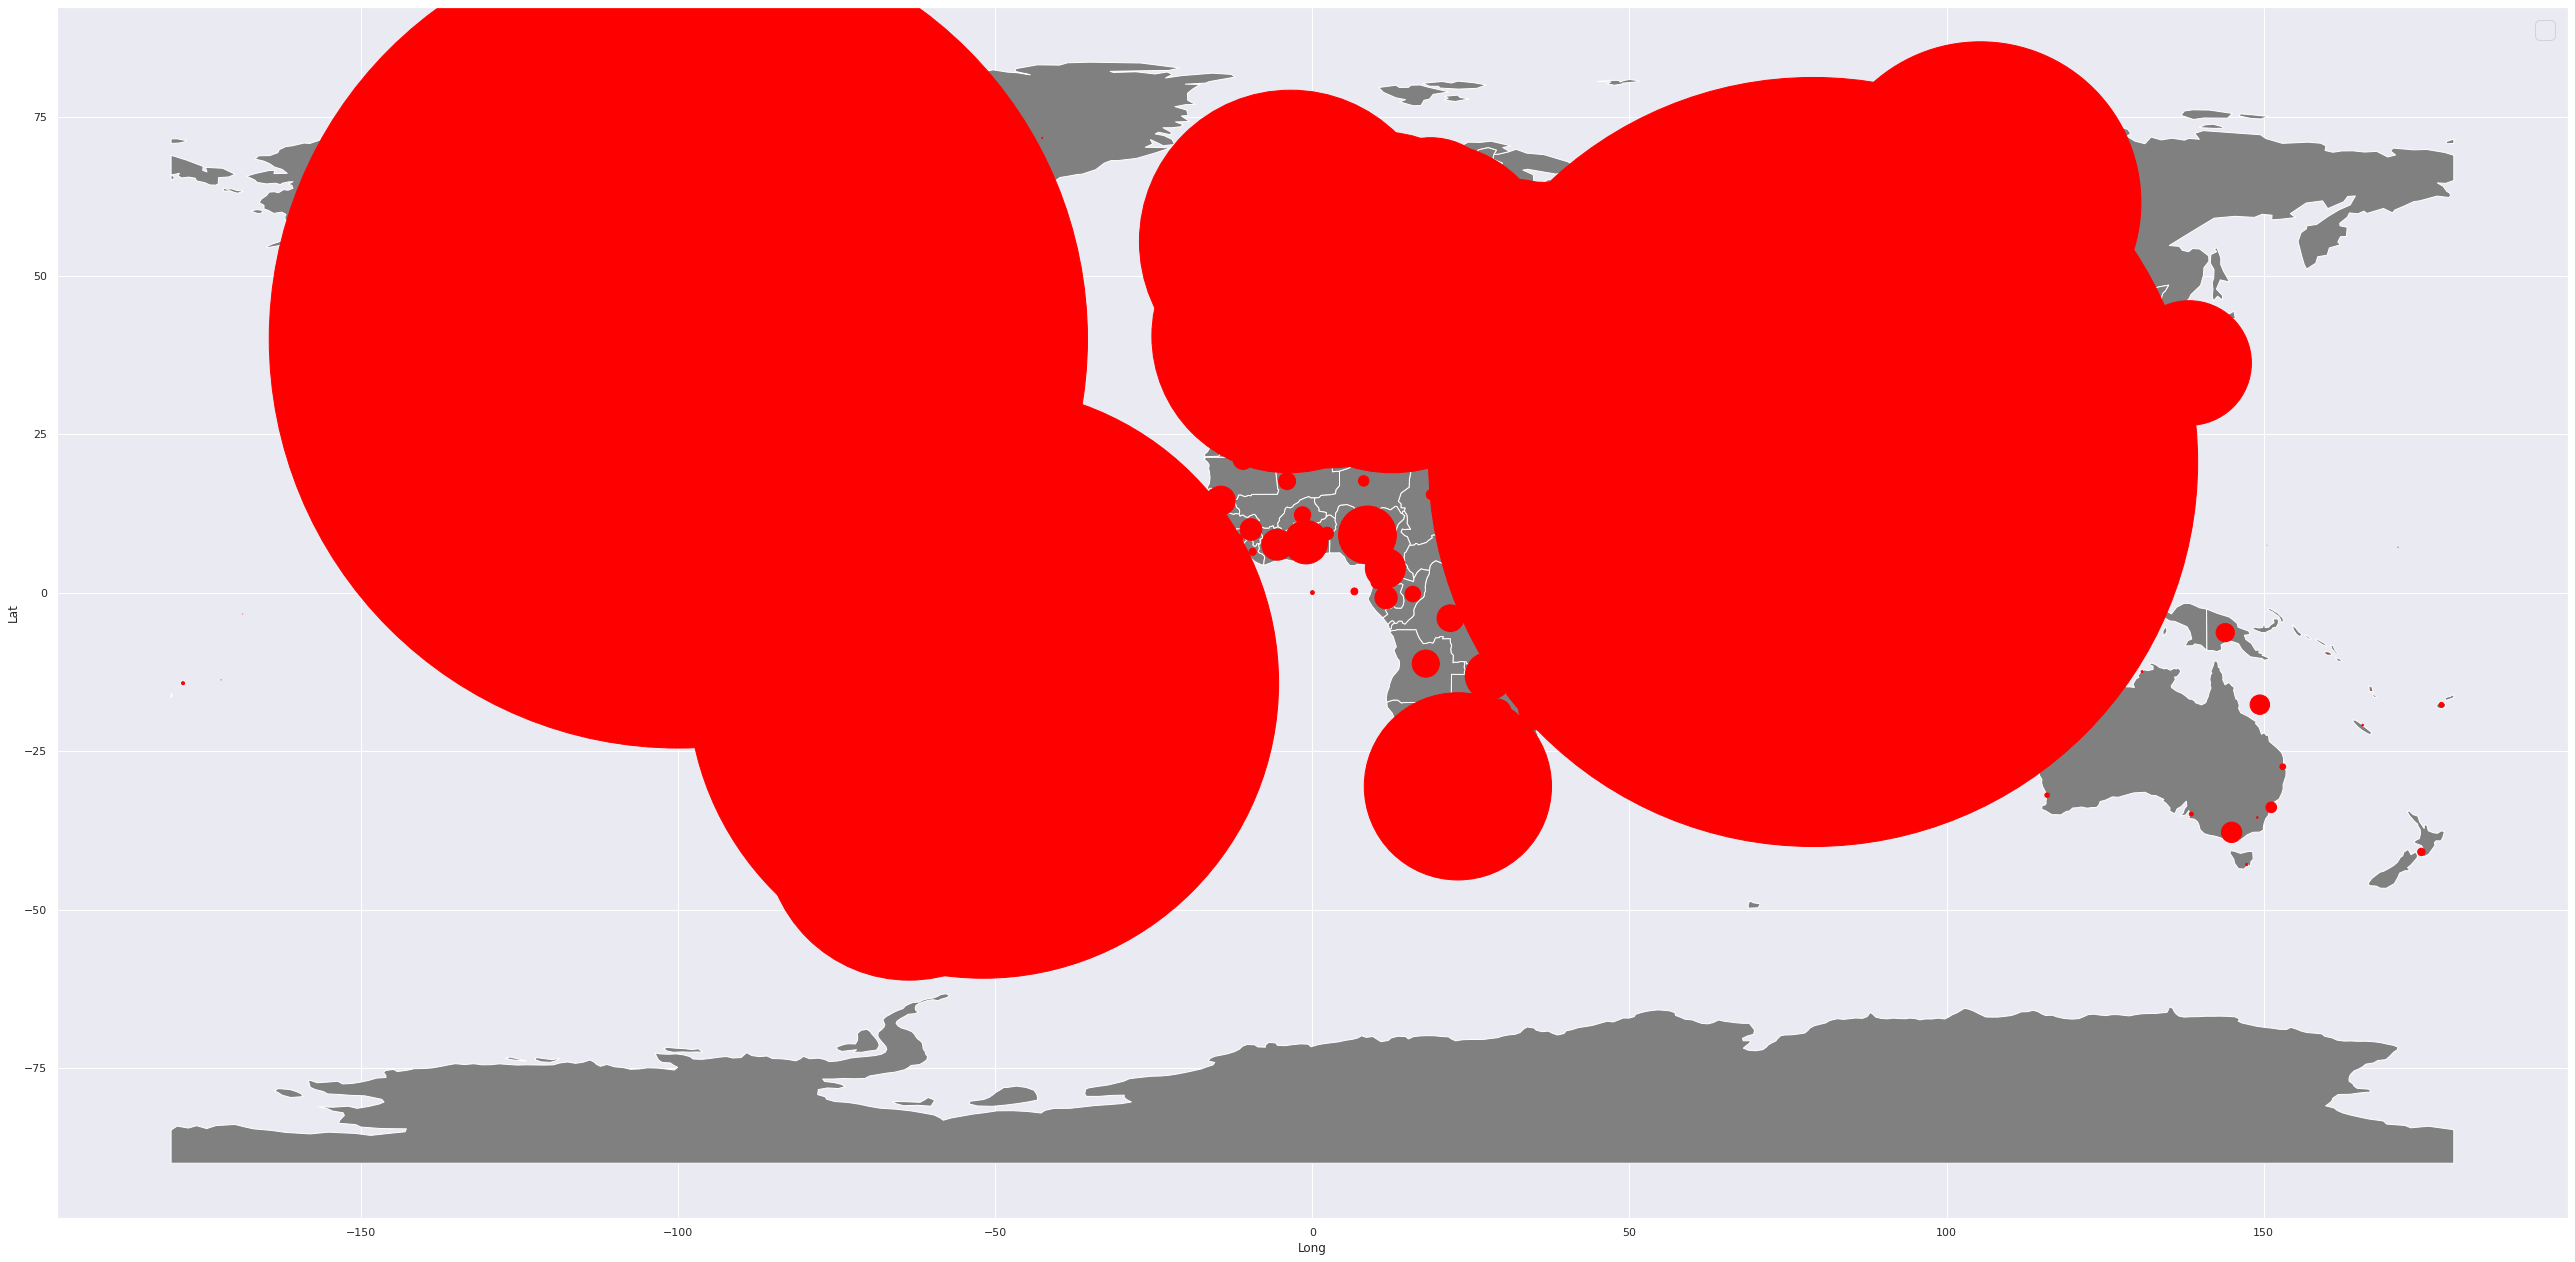

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/50, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/10/21,259872,0,3943704,150376,3568460,97938,15211176,137224,398092,289754
6/11/21,261195,0,3949597,150376,3574000,97956,15260459,138037,398727,293332
6/12/21,261195,0,3954097,150376,3577840,97979,15271120,138581,399092,296855
6/13/21,261195,0,3957557,150376,3581340,97993,15400169,139022,399194,300119


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/10/21,338048,385353,267447,7662,75351,244295,305569,49110,27806,153578
6/11/21,339900,386269,269308,7662,75351,245695,306698,49179,28106,154866
6/12/21,339900,387127,271131,7662,75351,247074,307847,49232,28422,156238
6/13/21,339900,387842,271703,7662,75351,247728,308650,49277,28723,157708


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/10/21,4298,6419,8388,188,2284,6567,3695,989,630,1057
6/11/21,4322,6427,8416,188,2288,6599,3700,990,644,1065
6/12/21,4322,6439,8439,188,2292,6606,3705,996,656,1075
6/13/21,4322,6444,8455,188,2295,6631,3707,997,670,1087


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/10/21,338048,385353,267447,7662,75351,244295,305569,49110,27806,153578
6/11/21,339900,386269,269308,7662,75351,245695,306698,49179,28106,154866
6/12/21,339900,387127,271131,7662,75351,247074,307847,49232,28422,156238
6/13/21,339900,387842,271703,7662,75351,247728,308650,49277,28723,157708


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6/10/21,4298,6419,8388,188,2284,6567,3695,989,630,1057
6/11/21,4322,6427,8416,188,2288,6599,3700,990,644,1065
6/12/21,4322,6439,8439,188,2292,6606,3705,996,656,1075
6/13/21,4322,6444,8455,188,2295,6631,3707,997,670,1087


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
6/10/21,1.006074,1.002187,1.006719,1.0,1.004908,1.003401,1.003748,1.000407,1.009915,1.007597
6/11/21,1.005479,1.002377,1.006958,1.0,1.000000,1.005731,1.003695,1.001405,1.010789,1.008387
6/12/21,1.000000,1.002221,1.006769,1.0,1.000000,1.005613,1.003746,1.001078,1.011243,1.008859
6/13/21,1.000000,1.001847,1.002110,1.0,1.000000,1.002647,1.002608,1.000914,1.010590,1.009409


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1263,1263,1263,1263,1263,1263,1263,1263,1263,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,11930,12024,12024,12027,12052,12092,12092,12092,12199,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,4031,4032,4032,4032,4033,4033,4036,4036,4037,POINT (-59.54320 13.19390)
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,12861,12899,12909,12916,12924,12938,12938,12938,12971,POINT (-88.49760 17.18990)
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,5663,5680,5694,5707,5721,5729,5736,5742,5749,POINT (-63.74430 44.68200)
92,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,3571067,3593016,3611602,3633481,3665137,3694707,3724705,3753224,3777600,POINT (-74.29730 4.57090)
96,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,327979,331920,333820,336007,338048,339900,339900,339900,343604,POINT (-83.75340 9.74890)
99,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,148918,150103,151259,152420,153578,154866,156238,157708,159057,POINT (-77.78117 21.52176)
107,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,188,188,188,188,188,189,189,189,189,POINT (-61.37100 15.41500)
108,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,301078,301984,302988,304428,305569,306698,307847,308650,309477,POINT (-70.16270 18.73570)


In [37]:
temp.drop([24,47,92,107,121,122,126,137,183,194, 217, 219, 238, 251, 255, 256, 257, 263, 265, 270], axis=0, inplace=True)

In [38]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1263,1263,1263,1263,1263,1263,1263,1263,1263,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,11930,12024,12024,12027,12052,12092,12092,12092,12199,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,4031,4032,4032,4032,4033,4033,4036,4036,4037,POINT (-59.54320 13.19390)
96,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,327979,331920,333820,336007,338048,339900,339900,339900,343604,POINT (-83.75340 9.74890)
99,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,148918,150103,151259,152420,153578,154866,156238,157708,159057,POINT (-77.78117 21.52176)
108,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,301078,301984,302988,304428,305569,306698,307847,308650,309477,POINT (-70.16270 18.73570)
111,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,74141,74141,74983,74983,75351,75351,75351,75351,75351,POINT (-88.89650 13.79420)
119,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,24534,24725,24935,25093,25292,25292,25506,25506,25506,POINT (-53.12580 3.93390)
128,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,2040,2040,2040,2040,2040,2040,2040,2040,2040,POINT (-63.05010 18.07080)
138,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,261958,262255,263836,265662,267447,269308,271131,271703,271990,POINT (-90.23080 15.78350)


In [39]:
len(temp)

22

In [40]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [41]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'6/13/21'

In [42]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [43]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [44]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [45]:
cases_camcar_all

,Province/State,Country/Region,6/13/21,6/14/21
0,NaN,Panama,387842,388325
1,NaN,Costa Rica,339900,343604
2,NaN,Dominican Republic,308650,309477
3,NaN,Guatemala,271703,271990
4,NaN,Honduras,247728,248115
5,NaN,Cuba,157708,159057
6,NaN,El Salvador,75351,75351
7,NaN,Jamaica,49277,49356
8,NaN,Trinidad and Tobago,28723,28982
9,French Guiana,France,25506,25506


In [46]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [47]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [48]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [49]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,232,232,232,232,232,234,236,236,236,237
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,47
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,325,325,325,325,325,325,325,325,325,326
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,88,88,88,88,88,88,89,89,89,90
92,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,91422,91961,92496,92923,93394,94046,94615,95192,95778,96366
96,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,4153,4153,4228,4251,4278,4298,4322,4322,4322,4388
99,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,1003,1012,1025,1033,1045,1057,1065,1075,1087,1098
107,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,3652,3654,3655,3672,3686,3695,3700,3705,3707,3708


In [51]:
temp_deaths.drop([24,47,92,107,121,122,126,137,183,194, 217, 219, 238, 251, 255, 256, 257, 263, 265, 270], axis=0, inplace=True)

In [52]:

temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,232,232,232,232,232,234,236,236,236,237
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,47
96,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,4153,4153,4228,4251,4278,4298,4322,4322,4322,4388
99,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,1003,1012,1025,1033,1045,1057,1065,1075,1087,1098
108,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,3652,3654,3655,3672,3686,3695,3700,3705,3707,3708
111,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,2266,2270,2274,2279,2279,2284,2288,2292,2295,2299
119,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,121,121,121,126,129,130,130,133,133,133
128,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
138,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,8280,8294,8305,8331,8361,8388,8416,8439,8455,8465


In [53]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [54]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'6/13/21'

In [55]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [56]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [57]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [58]:
deaths_camcar_all

,Province/State,Country/Region,6/13/21,6/14/21
0,NaN,Guatemala,8455,8465
1,NaN,Honduras,6631,6653
2,NaN,Panama,6444,6451
3,NaN,Costa Rica,4322,4388
4,NaN,Dominican Republic,3707,3708
5,NaN,El Salvador,2295,2299
6,NaN,Cuba,1087,1098
7,NaN,Jamaica,997,1011
8,NaN,Trinidad and Tobago,670,677
9,NaN,Guyana,426,430


In [59]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [60]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,10932,10932,11026,11026,11081,11081,11081,11081,11081,11136
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,3922,3922,3922,3922,3963,3965,3968,3971,3971,3971
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,12439,12439,12442,12449,12456,12460,12463,12463,12463,12479
77,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,3290596,3310737,3340543,3365050,3385586,3409076,3435109,3457117,3477656,3510709
81,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,247905,247905,249209,252688,258822,259872,261195,261195,261195,262852
84,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,140809,141949,143105,144136,145337,146418,147553,148732,149759,150855
92,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,187,187,188,188,188,188,188,188,188,188
93,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,244244,245190,246216,247262,248104,248966,249637,250595,251689,252803
96,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,69215,69215,69215,69867,69867,70150,70150,70150,70150,70150


In [62]:
temp_recovered.drop([24,77,92,106,107,111,122,168,179,202,204,223,236,240,241,242,248,250,255], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [63]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,10932,10932,11026,11026,11081,11081,11081,11081,11081,11136
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,3922,3922,3922,3922,3963,3965,3968,3971,3971,3971
81,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,247905,247905,249209,252688,258822,259872,261195,261195,261195,262852
84,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,140809,141949,143105,144136,145337,146418,147553,148732,149759,150855
93,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,244244,245190,246216,247262,248104,248966,249637,250595,251689,252803
96,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,69215,69215,69215,69867,69867,70150,70150,70150,70150,70150
104,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995
113,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399
123,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,238344,239176,239804,240961,242033,243191,244416,245610,246426,247134


In [64]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'6/13/21'

In [65]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,6/13/21,6/14/21
0,NaN,Panama,371984,372341
1,NaN,Costa Rica,261195,262852
2,NaN,Dominican Republic,251689,252803
3,NaN,Guatemala,246426,247134
4,NaN,Cuba,149759,150855
5,NaN,Honduras,88164,89324
6,NaN,El Salvador,70150,70150
7,NaN,Jamaica,27542,27732
8,NaN,Trinidad and Tobago,18804,19141
9,NaN,Guyana,16280,16313


In [66]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [67]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [68]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [69]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,1263,1263,1263,1263,1263,1263,1263,1263,1263,1263
1,Bahamas,0,0,0,0,0,0,0,0,0,...,11930,11930,12024,12024,12027,12052,12092,12092,12092,12199
2,Barbados,0,0,0,0,0,0,0,0,0,...,4030,4031,4032,4032,4032,4033,4033,4036,4036,4037
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,327979,327979,331920,333820,336007,338048,339900,339900,339900,343604
4,Cuba,0,0,0,0,0,0,0,0,0,...,147831,148918,150103,151259,152420,153578,154866,156238,157708,159057
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,299681,301078,301984,302988,304428,305569,306698,307847,308650,309477
6,El Salvador,0,0,0,0,0,0,0,0,0,...,74141,74141,74141,74983,74983,75351,75351,75351,75351,75351
7,French Guiana,0,0,0,0,0,0,0,0,0,...,24534,24534,24725,24935,25093,25292,25292,25506,25506,25506
8,St Martin,0,0,0,0,0,0,0,0,0,...,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040
9,Guatemala,0,0,0,0,0,0,0,0,0,...,261392,261958,262255,263836,265662,267447,269308,271131,271703,271990


In [70]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
1,Bahamas,0,0,0,0,0,0,0,0,0,...,232,232,232,232,232,234,236,236,236,237
2,Barbados,0,0,0,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,47
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,4153,4153,4228,4251,4278,4298,4322,4322,4322,4388
4,Cuba,0,0,0,0,0,0,0,0,0,...,1003,1012,1025,1033,1045,1057,1065,1075,1087,1098
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,3652,3654,3655,3672,3686,3695,3700,3705,3707,3708
6,El Salvador,0,0,0,0,0,0,0,0,0,...,2266,2270,2274,2279,2279,2284,2288,2292,2295,2299
7,French Guiana,0,0,0,0,0,0,0,0,0,...,121,121,121,126,129,130,130,133,133,133
8,St Martin,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
9,Guatemala,0,0,0,0,0,0,0,0,0,...,8280,8294,8305,8331,8361,8388,8416,8439,8455,8465


In [71]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,1214,1214,1214,1214,1214,1214,1214,1214,1214,1214
1,Bahamas,0,0,0,0,0,0,0,0,0,...,10932,10932,11026,11026,11081,11081,11081,11081,11081,11136
2,Barbados,0,0,0,0,0,0,0,0,0,...,3922,3922,3922,3922,3963,3965,3968,3971,3971,3971
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,247905,247905,249209,252688,258822,259872,261195,261195,261195,262852
4,Cuba,0,0,0,0,0,0,0,0,0,...,140809,141949,143105,144136,145337,146418,147553,148732,149759,150855
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,244244,245190,246216,247262,248104,248966,249637,250595,251689,252803
6,El Salvador,0,0,0,0,0,0,0,0,0,...,69215,69215,69215,69867,69867,70150,70150,70150,70150,70150
7,French Guiana,0,0,0,0,0,0,0,0,0,...,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995
8,St Martin,0,0,0,0,0,0,0,0,0,...,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399
9,Guatemala,0,0,0,0,0,0,0,0,0,...,238344,239176,239804,240961,242033,243191,244416,245610,246426,247134


In [72]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [73]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [74]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [75]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [76]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [77]:
cases_camcar_all.shape

(472, 22)

In [78]:
recovered_camcar_all.shape

(472, 22)

In [79]:
deaths_camcar_all.shape

(472, 22)

In [80]:
active_camcar_all.shape

(472, 22)